# 7.4 使用多层神经网络实现异或运算结果的分类

### 1.任务描述

在逻辑运算中，与运算、或运算和非运算的结果都是线性可分的，可以使用一条直线将结果分开，但是异或运算的结果是线性不可分的，需要两条直线才能将其分开，如图7-4-1所示。

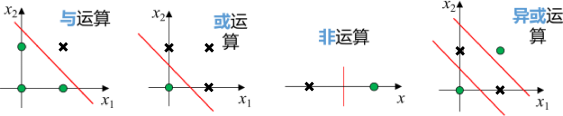

图7-4-1  逻辑运算结果分类

请构造一个两层的神经网络，并对异或运算的结果进行分类。

### 2.知识准备

见教程。

### 3.任务分析

1. 使用一个感知器实现与运算，运算过程如图7-4-16所示。

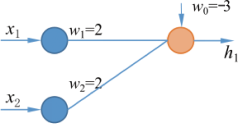

图7-4-16  与运算过程

感知器的表达式为：

$z_1=2x_1+2x_2-3$

$h_1=step(2x_1+2x_2-3)$

式中，$z_1$为线性输出，$h_1$为线性输出经阶跃函数运算后的结果。

将4个点分别带入上述两个公式，运算结果如图7-4-17所示。与运算决策边界如图7-4-18所示。

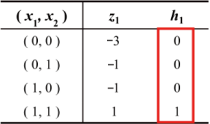

图7-4-17  与感知器运算结果

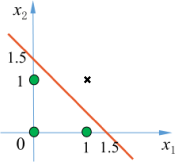

图7-4-18  与感知器决策边界

2. 使用一个感知器实现或非运算，运算过程如7-4-19所示。

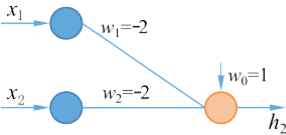

图7-4-19  或非运算过程

感知器的表达式为：

$z_2=-2x_1-2x_2+1$

$h_2=step(-2x_1-2x_2+1)$

式中，$z_2$为线性输出，$h_2$为线性输出经阶跃函数运算后的结果。

将4个点分别带入上述两个公式，运算结果如图7-4-20所示。

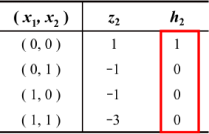

图7-4-20  或非感知器运算结果

或非运算决策边界如图7-4-21所示。

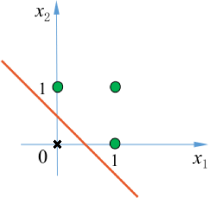

图7-4-21  或非运算决策边界

3. 对与运算和或非运算的结果，再使用一个感知器实现异或运算，如图7-4-22所示
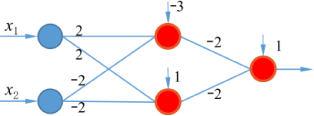g)

图7-4-22  异或运算过程

网络中共有3个神经元，每个神经元有3个参数，共9个参数，感知器的表达式为：

$z=-2h_1-2h_2+1$

$y=step(-2h_1-2h+1_+1

式中，z为线性输出，y为线性输出经阶跃函数运算后的结果。

将4个点分别带入上述两个公式，运算结5df3ff966ee.png)

图7-4-23  异或感知器运算结果

异a834-713e13d9c8a9.png)

图7-4-24  异或运算决策边界

可见，使用两条直线就可以将两个类别分开。

经过神经网络运算后，输出的结果$\hat{Y}$是预测值，是一个形状为(120,3)的二维数组，是每个样本分别属于不同类别的概率。

$\hat{Y}=\left [ \begin{array}{c} 
  \hat{y}_1^1&\hat{y}_1^2&\hat{y}_1^3\\
  \hat{y}_2^1&\hat{y}_2^2&\hat{y}_2^3\\
  ...&...&...\\
  \hat{y}_{120}^1&\hat{y}_{120}^2&\hat{y}_{120}^3&
\end{array} \right ]$

输入层和输出层之间连接的权值，构成一个形状是(4,3)的权值矩阵W：

$Y=\left [ \begin{array}{c} 
w_{11}&w_{12}&w_{12}\\
w_{21}&w_{22}&w_{23}\\
w_{31}&w_{32}&w_{33}\\
w_{41}&w_{42}&w_{43}
\end{array} \right ]$

输出层的每个神经元还有$B=[b_1,b_2,b_3]$一个偏置项b，把它们表示为一个一维数组：，它和W共同构成了神经网络的模型参数。$Y=XW+B$输入数据、模型参数和输出数据之间的关系为，这就是神经网络的数学模型。


### 4.任务实施


执行代码

In [2]:
# 实现阶跃函数
def step(x):
    # 如果x>0，返回1；否则返回0
    return 1 if x>0 else 0

# 实现与运算
def fun_and(x1,x2):
    # 线性输出
    z1=2*x1+2*x2-3
    # 经阶跃函数进行运算
    h1=step(z1)
    return h1

# 实现或非运算
def fun_nor(x1,x2):
    # 线性输出
    z1=-2*x1-2*x2+1
    # 经阶跃函数进行运算
    h1=step(z1)
    return h1

# 实现异或运算
def xor(x1,x2):
    # 第一层
    # 第一个感知器（与运算）
    z1=fun_and(x1,x2)
    # 第二个感知器（或非运算）
    z2=fun_nor(x1,x2)
    # 第二层
    z=fun_nor(z1,z2)
    return z
    
print("与运算：",fun_and(0,0),fun_and(0,1),fun_and(1,0),fun_and(1,1))
print("或非运算：",fun_nor(0,0),fun_nor(0,1),fun_nor(1,0),fun_nor(1,1))
print("异或运算：",xor(0,0),xor(0,1),xor(1,0),xor(1,1))

与运算： 0 0 0 1
或非运算： 1 0 0 0
异或运算： 0 1 1 0
